***Employee burnout prediction using machine learning algorithm***


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score
import pickle as pickle
import os


In [ ]:
data = pd.read_csv("/content/train.csv") # Try reading it as a CSV file since the extension is .csv

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3.0,6.0,7.8,0.61


In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.size

204750

In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.isnull().sum().values.sum()

4622

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
for i, col in enumerate(data.columns):
  print(f"\n\n{data[col].unique()}")
  print(f"\n{data[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64




['2008-09-30' '2008-11-30' '2008-03-10' '2008-11-03' '2008-07-24'
 '2008-11-26' '2008-01-02' '2008-10-31' '2008-12-27' '2008-03-09'
 '2008-03-16' '2008-05-12' '2008-01-20' '2008-02-23' '2008-05-14'
 '2008-02-03' '2008-03-17' '2008-03-28' '2008-05-29' '2008-06-27'
 '2008-08-31' '2008-01-15' '2008-05-04' '2008-11-17' '2008-09-14'
 '2008-10-09' '2008-10-11' '2008-09-18' '2008-09-16' '2008-12-16'
 '2008-05-03' '2008-08-04' '2008-07-31' '2008-06-17' '2008-0

In [ ]:
# Calculate correlations only for numeric columns
data.corr(numeric_only=True)

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878398,0.690867,0.736578
Resource Allocation,0.878398,1.000000,0.800265,0.856154
Mental Fatigue Score,0.690867,0.800265,1.000000,0.944737
Burn Rate,0.736578,0.856154,0.944737,1.000000


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736578
Resource Allocation     0.856154
Mental Fatigue Score    0.944737
Name: Burn Rate, dtype: float64

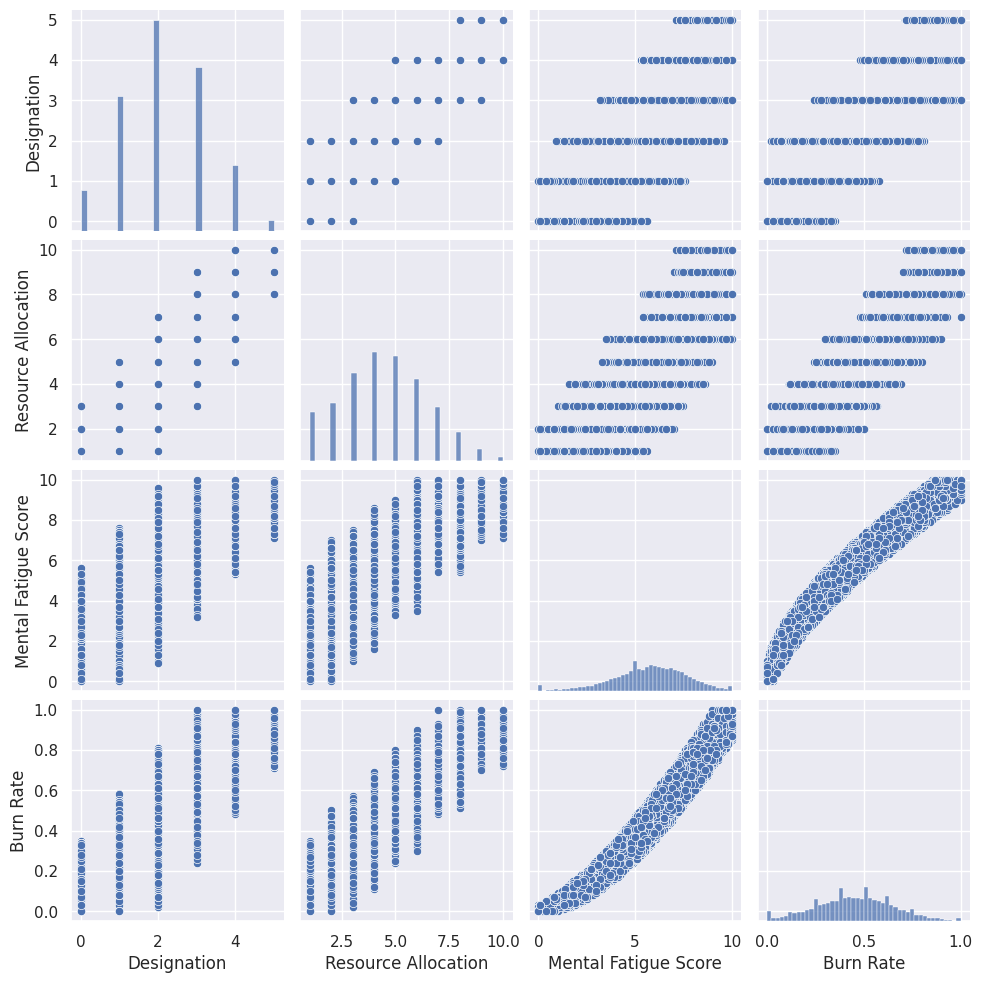

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(12459, 9)

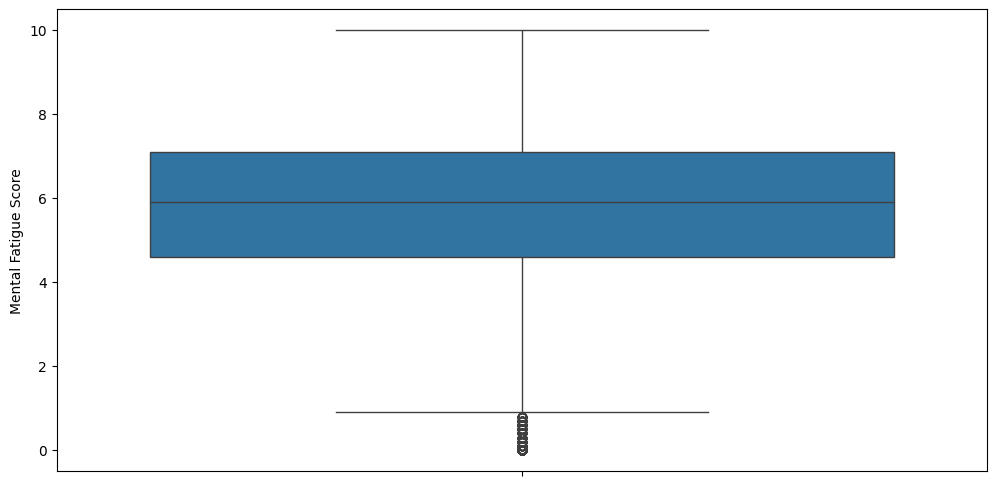

In [ ]:
import seaborn as sb
plt.figure(figsize=(12,6))
sb.boxplot(data['Mental Fatigue Score'])
plt.show()

In [ ]:
data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [ ]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
print({ c : data_obj[c].unique()[:10] for c in data_obj.columns})

{'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object), 'Date of Joining': array(['2008-09-30', '2008-11-30', '2008-11-03', '2008-07-24',
       '2008-11-26', '2008-01-02', '2008-10-31', '2008-03-16',
       '2008-05-12', '2008-05-14'], dtype=object), 'Gender': array(['Female', 'Male'], dtype=object), 'Company Type': array(['Service', 'Product'], dtype=object), 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


Min date 2008-01-01
Max date 2008-12-31


<Axes: xlabel='Month', ylabel='Hired employees'>

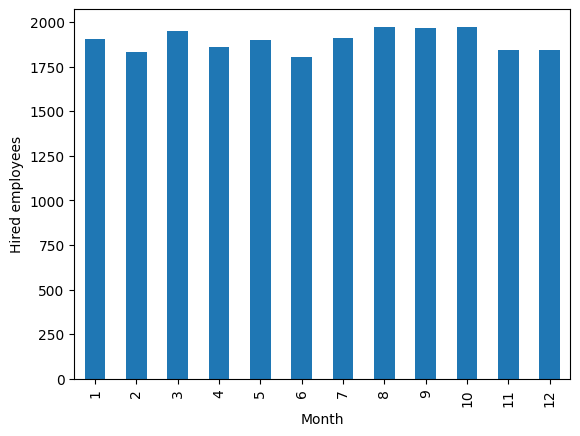

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")


In [ ]:
data_2007 = pd.to_datetime(["2007-07-07"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2007).dt.days
data.Days

0        451
1        512
3        485
4        383
5        508
        ... 
15285    378
15286    360
15287    528
15289    234
15290    425
Name: Days, Length: 12459, dtype: int64

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Name: Burn Rate, dtype: float64

In [ ]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [ ]:
data.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,Male,Product,Yes,2.0,4.0,3.6,0.29


In [ ]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns

In [ ]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
X_train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
18275,NaN,NaN,NaN,NaN,NaN,-0.159082,0.257209,0.300852
13833,NaN,NaN,NaN,NaN,NaN,0.722958,0.257209,0.666504
11163,NaN,NaN,NaN,NaN,NaN,0.722958,0.257209,NaN
9522,NaN,NaN,NaN,NaN,NaN,-1.041122,-0.722930,-1.318467
15832,NaN,NaN,NaN,NaN,NaN,0.722958,-0.232861,-0.273745
...,...,...,...,...,...,...,...,...
10955,NaN,NaN,NaN,NaN,NaN,0.722958,0.257209,NaN
17289,NaN,NaN,NaN,NaN,NaN,-0.159082,-0.722930,-0.221509
5192,NaN,NaN,NaN,NaN,NaN,0.722958,0.257209,0.091907
12172,NaN,NaN,NaN,NaN,NaN,0.722958,1.237347,1.920170


In [ ]:
y_train

18275    0.41
13833    0.58
11163    0.56
9522     0.26
15832    0.47
         ... 
10955    0.41
17289    0.38
5192     0.45
12172     NaN
235       NaN
Name: Burn Rate, Length: 15924, dtype: float64

In [ ]:
import os

path = '../data/processed/'

# Create the directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

**Linear** **regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Handle missing values in y_train (if any)
y_train_imputed = y_train.fillna(y_train.mean()) # Fill missing values with the mean

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model using the imputed data
linear_regression_model.fit(X_train_imputed, y_train_imputed) # Use imputed y_train

LinearRegression()

In [ ]:
feature_names=X.columns.tolist()
feature_names

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Handle missing values in X_test (if any)
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill missing values (e.g., with the mean)
X_test_imputed = imputer.fit_transform(X_test) # Fit the imputer on X_test and transform it

# Handle missing values in y_test (if any) - THIS IS THE FIX
y_test_imputed = y_test.fillna(y_test.mean()) # Fill missing values with the mean, similar to y_train

#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set using imputed data
y_pred = linear_regression_model.predict(X_test_imputed) # Use imputed X_test for prediction

# Calculate mean squared error
mse = mean_squared_error(y_test_imputed, y_pred) # Use imputed y_test
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test_imputed, y_pred, squared=False) # Use imputed y_test
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test_imputed, y_pred) # Use imputed y_test
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test_imputed, y_pred) # Use imputed y_test
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.006290605358564317
Root Mean Squared Error: 0.07931333657440164
Mean Absolute Error: 0.057741866701761846
R-squared Score: 0.831996858130198


In [ ]:

# Create the 'models' directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

model_filename = '../models/linear_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pickle.dump(linear_regression_model, model_file)

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Set dual to True or False depending on your problem (number of samples vs number of features)
SVMLinear = LinearSVR(dual=True, max_iter=10000)  # You can adjust 'max_iter' as needed

# Handle missing values in X_train using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(X_train)

# Handle missing values in y_train - THIS IS THE FIX
y_train_imputed = y_train.fillna(y_train.mean()) # Fill missing values with the mean

# Fit the model using the imputed data
SVMLinear.fit(X_train_imputed, y_train_imputed) # Use imputed X_train and y_train

LinearSVR(max_iter=10000)

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (rest of your code)

#Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")

# Handle missing values in X_test using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_test_imputed = imputer.fit_transform(X_test) # Impute missing values in X_test

# Handle missing values in y_test - THIS IS THE FIX
y_test_imputed = y_test.fillna(y_test.mean()) # Fill missing values with the mean

# Make predictions on the test set using imputed data
y_pred = SVMLinear.predict(X_test_imputed) # Use imputed X_test for predictions

# ... (rest of your performance metric calculations)

# Calculate mean squared error
mse = mean_squared_error(y_test_imputed, y_pred) # Use imputed y_test
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test_imputed, y_pred, squared=False) # Use imputed y_test
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test_imputed, y_pred) # Use imputed y_test
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test_imputed, y_pred) # Use imputed y_test
print("R-squared Score:", r2)

Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.006277799592057307
Root Mean Squared Error: 0.07923256648662409
Mean Absolute Error: 0.05736628838037571
R-squared Score: 0.8323388616234388
